In [72]:
from IPython.display import display
display({'text/html': '<h1>Topic6 Assignment - Part 2</h1>', 'text/plain': 'Topic6 Assignment - Part 2'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>12/06/2021</h1>', 'text/plain': '12/06/2021'}, raw=True)

Topic6 Assignment - Part 2

Anoop Korappath

12/06/2021

# Part 2
#### Problem 1

C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


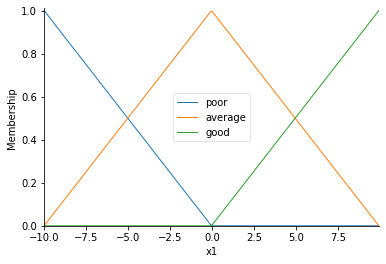

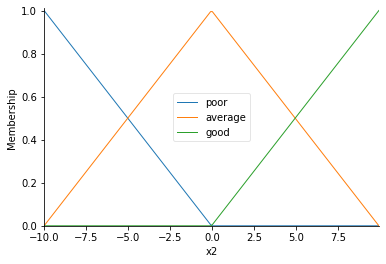

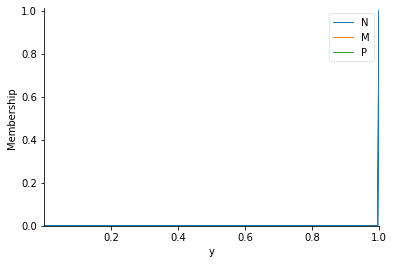

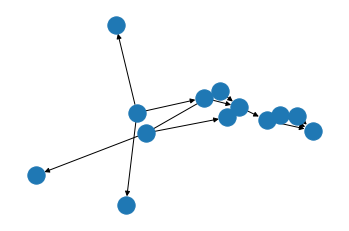

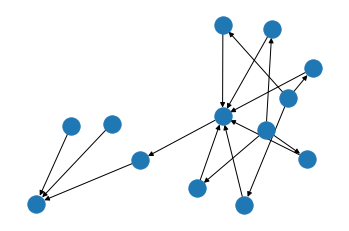

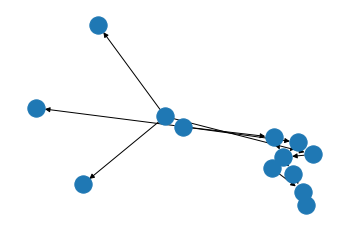

In [73]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Set variable range
# input
x1_range = np.arange(-10, 10,0.1, np.float32)  # Input 1
x2_range = np.arange(-10, 10,0.1, np.float32)    # Input 2
# output
y_range = (np.sin(x1_range) * np.sin(x2_range)) / (x1_range * x2_range)

# Create fuzzy control variables
x1 = ctrl.Antecedent(x1_range, 'x1') # Input 1
x2 = ctrl.Antecedent(x2_range, 'x2') #Input 2
y = ctrl.Consequent(y_range, 'y')   # output

# Fuzzy sets and their membership functions are defined
x1.automf(3)  # Set 3 reference values and generate them automatically
x2.automf(3)
# Output set 3 reference values
y['N'] = fuzz.trimf(y_range, [1, 1, 5])
y['M'] = fuzz.trimf(y_range, [1, 5, 10])
y['P'] = fuzz.trimf(y_range, [5, 10, 10])

# Reference value setting visualization
x1.view(), x2.view(), y.view()


# Set the output defuzzification method - centroid defuzzification method
y.defuzzify_method = 'centroid'

# Rule output as N
rule0 = ctrl.Rule(antecedent=((x1['poor'] & x2['poor']) |
                              (x1['average'] & x2['poor'])),
                  consequent=y['N'], label='rule N')

# Rule output as M
rule1 = ctrl.Rule(antecedent=((x1['good'] & x2['poor']) |
                              (x1['poor'] & x2['average']) |
                              (x1['average'] & x2['average']) |
                              (x1['poor'] & x2['average']) |
                              (x1['good'] & x2['good'])),
                  consequent=y['M'], label='rule M')

# Rule output as P
rule2 = ctrl.Rule(antecedent=((x1['average'] & x2['good']) |
                              (x1['good'] & x2['good'])),
                  consequent=y['P'], label='rule P')

# Visualization of rule settings
rule0.view(), rule1.view(), rule2.view()

# System and running environment initialization
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2])
sim = ctrl.ControlSystemSimulation(system)


